In [76]:
# Abhinav Pathak 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
df= pd.read_excel(r"C:\Users\Arvind Vasa\AI-ML\stats and ML\ML projects\Edu data.xlsx")

In [36]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [38]:
df.shape

(480, 17)

In [39]:
numerical_features= ['raisedhands','VisITedResources','AnnouncementsView','Discussion']

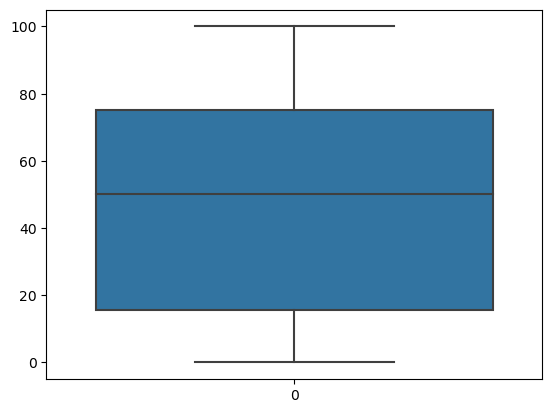

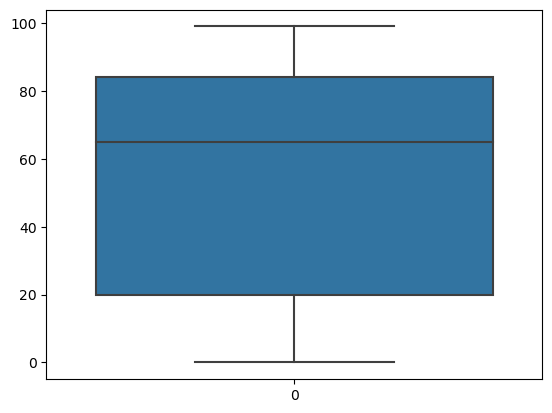

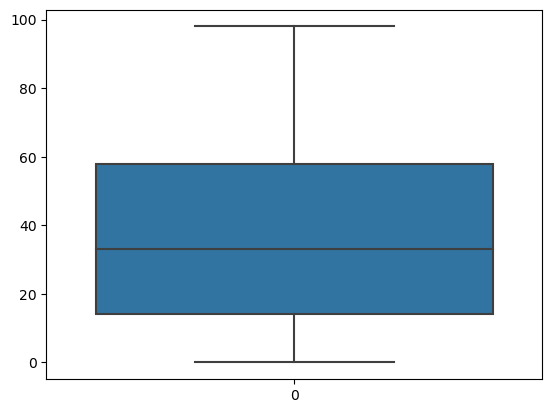

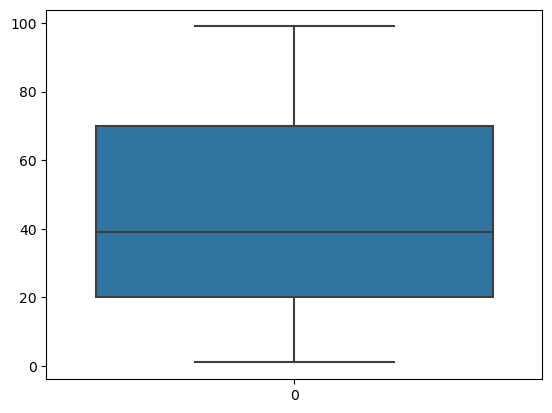

In [40]:
for feature in numerical_features:
    sns.boxplot(df[feature])
    plt.show()

#### No outliers found in numerical feature

In [41]:
df.describe().loc[['mean','50%'],:]

,raisedhands,VisITedResources,AnnouncementsView,Discussion
mean,46.775,54.797917,37.91875,43.283333
50%,50.000,65.000000,33.00000,39.000000


In [46]:
df['Class'].value_counts(normalize= True)

M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64

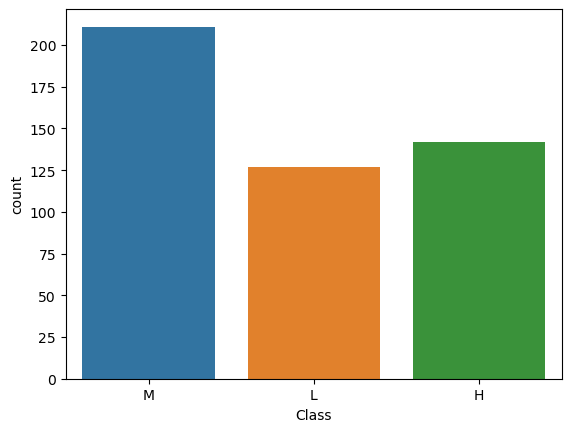

In [55]:
sns.countplot(x= df['Class'])
plt.show()

## getting required data type columns from df

In [59]:
obj_features= list(df.select_dtypes(include= object).columns)

### Univariate analysis

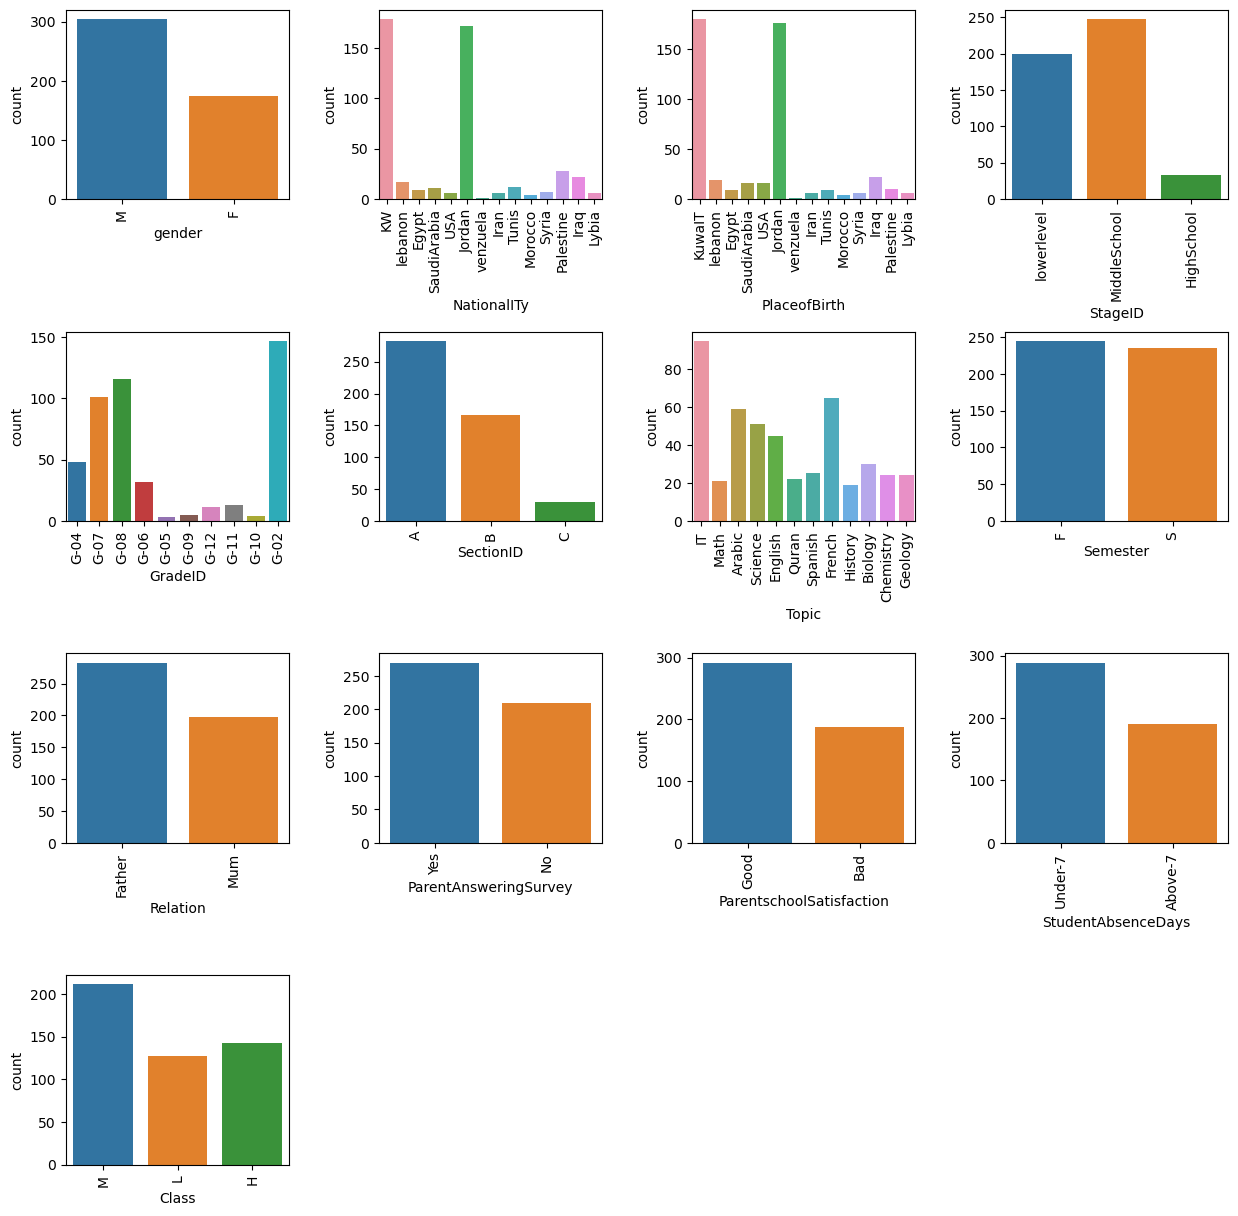

In [72]:
plt.figure(figsize= (15,15))
plt.subplots_adjust(hspace=0.7, wspace= 0.4)

for i in range(len(obj_features)):
    plt.subplot(4,4,i+1)
    plt.xticks(rotation= 90)
    sns.countplot(x= df[obj_features[i]])

### Conclusions after coutplot
- Males have are higher count
- KW and Jordan student cound is high

In [83]:
x= df.groupby(by='Class').agg(raisedhand=('raisedhands','mean'),
                             Resources=('VisITedResources','mean'),
                             Discussion= ('Discussion','mean'),
                             Announcement=('AnnouncementsView','mean'))
x

,raisedhand,Resources,Discussion,Announcement
Class,,,,
H,70.288732,78.746479,53.661972,53.380282
L,16.889764,18.322835,30.834646,15.574803
M,48.938389,60.635071,43.791469,40.962085


([<matplotlib.patches.Wedge at 0x28bfcd1b640>,
 [Text(-0.05659796968350428, 1.0985429758674465, 'H'),
  Text(-0.9691292271920776, -0.5203734630071815, 'L'),
  Text(0.4698199480189691, -0.9946201367574725, 'M')],
 [Text(-0.030871619827365963, 0.5992052595640617, '51.64'),
  Text(-0.5286159421047696, -0.2838400707311899, '12.41'),
  Text(0.2562654261921649, -0.542520074594985, '35.95')])

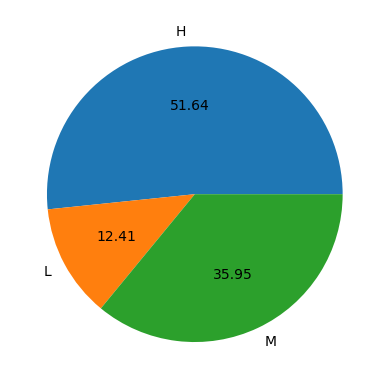

In [94]:
plt.pie(labels= x.index, x= x['raisedhand'].values,autopct='%0.2f')

# as the raisedhand increases they study well(H)
# it converts to percentages automatically

([<matplotlib.patches.Wedge at 0x28bfdaab610>,
 [Text(0.27926945549370796, 1.0639589142576176, 'H'),
  Text(-1.0680218540498816, -0.263304613085023, 'L'),
  Text(0.5258284285447477, -0.9661803474166515, 'M')],
 [Text(0.15232879390565887, 0.5803412259587004, '41.83'),
  Text(-0.582557374936299, -0.14362069804637617, '24.04'),
  Text(0.28681550647895326, -0.5270074622272644, '34.14')])

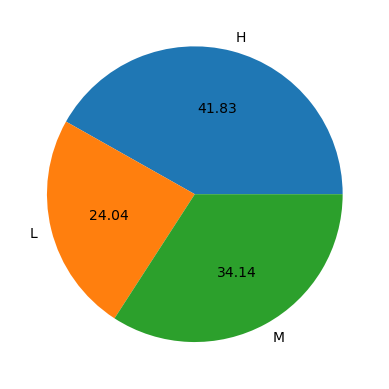

In [92]:
plt.pie(labels= x.index, x= x['Discussion'].values,autopct='%0.2f')

([<matplotlib.patches.Wedge at 0x28bfd948f70>,
 [Text(0.4018751039768062, 1.0239611324672588, ''),
  Text(-1.0877138949597427, -0.1639465849339529, ''),
  Text(0.5500001486524352, -0.9526278583383436, '')])

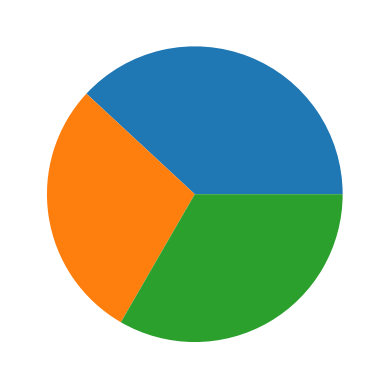

In [98]:
plt.pie(x=[800,600,700])

# pie chart automatically assigns percentages

<Axes: xlabel='Class', ylabel='Discussion'>

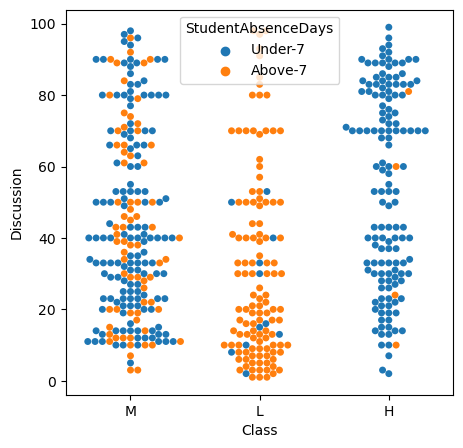

In [111]:
plt.figure(figsize=(5,5))
sns.swarmplot(x=df['Class'], y=df['Discussion'], hue= df['StudentAbsenceDays'])

# swarmplot can give two and three feature analysis
# swarmplot : in here it shows that people who absent more has less scoring (L)

<Axes: xlabel='Class', ylabel='VisITedResources'>

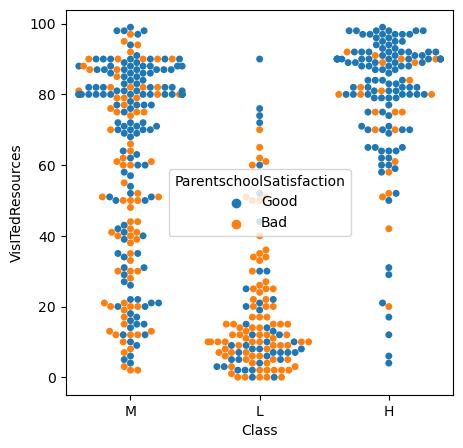

In [114]:
plt.figure(figsize=(5,5))
sns.swarmplot(x=df['Class'], y=df['VisITedResources'], hue= df['ParentschoolSatisfaction'])

# inference: parents who are satisfied and visited resurce is high belongs more to H category
# parents who are not satisfied and visited less resources belongs to L category

In [120]:
c= len(df[df['Topic']=='IT'])
a= len(df[(df['Topic']=='IT') & (df['Class']=='H')])
b= len(df[(df['Topic']=='IT') & (df['Class']=='M')])
b

42

In [122]:
print(((a+b)/c)*100)

# percentage of people belonging to IT and H and M class to total IT people

60.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Math'),
  Text(2, 0, 'Arabic'),
  Text(3, 0, 'Science'),
  Text(4, 0, 'English'),
  Text(5, 0, 'Quran'),
  Text(6, 0, 'Spanish'),
  Text(7, 0, 'French'),
  Text(8, 0, 'History'),
  Text(9, 0, 'Biology'),
  Text(10, 0, 'Chemistry'),
  Text(11, 0, 'Geology')])

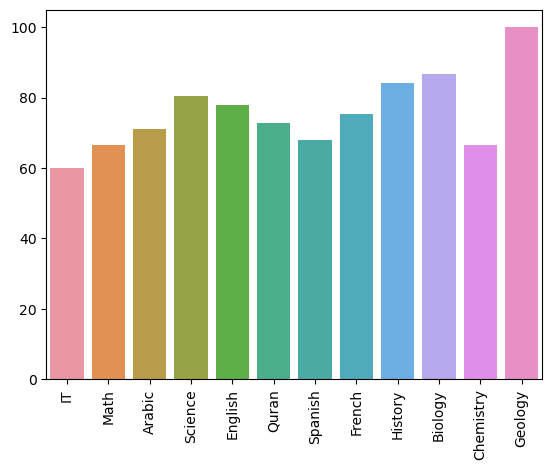

In [126]:
d=[]
e=[]

for i in df['Topic'].unique():
    c= len(df[df['Topic']==i])
    a= len(df[(df['Topic']==i) & (df['Class']=='H')])
    b= len(df[(df['Topic']==i) & (df['Class']=='M')])
    d.append(i)
    e.append(((a+b)/c)*100)
    
sns.barplot(x= d, y= e)
plt.xticks(rotation= 90)